In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [74]:
# open spec2006-simpoint--stats-cryocorecryocache.csv
df1 = pd.read_csv("baseline.csv")
# open spec2006-simpoint--stats-supercorecryocache.csv
df2 = pd.read_csv("supercorecryocache.csv")
# open spec2006-simpoint--stats-supercoresupercache.csv
df3 = pd.read_csv("supercoresupercache.csv")

# rename Unnamed: 0 to Benchmark
df1.rename(columns={'Unnamed: 0': 'Benchmark'}, inplace=True)
df2.rename(columns={'Unnamed: 0': 'Benchmark'}, inplace=True)
df3.rename(columns={'Unnamed: 0': 'Benchmark'}, inplace=True)

# all columns append with _cryocorecryocache except Benchmark
df1.columns = [str(col) + '_cryocorecryocache' if col != 'Benchmark' else col for col in df1.columns]
# all columns append with _supercorecryocache except Benchmark
df2.columns = [str(col) + '_supercorecryocache' if col != 'Benchmark' else col for col in df2.columns]
# all columns append with _supercoresupercache except Benchmark
df3.columns = [str(col) + '_supercoresupercache' if col != 'Benchmark' else col for col in df3.columns]

# merge df1 and df2 on Benchmark
df = pd.merge(df1, df2, on='Benchmark')
# merge df and df3 on Benchmark
df = pd.merge(df, df3, on='Benchmark')

print(df.columns)

Index(['Benchmark', 'Cycles_cryocorecryocache',
       'Instructions_cryocorecryocache', 'IPC_cryocorecryocache',
       'Seconds_cryocorecryocache', 'l1dAccesses_cryocorecryocache',
       'l1iAccesses_cryocorecryocache', 'l2Accesses_cryocorecryocache',
       'l3Accesses_cryocorecryocache', 'l1dmisses_cryocorecryocache',
       'l1imisses_cryocorecryocache', 'l2misses_cryocorecryocache',
       'l3misses_cryocorecryocache', 'l1dhits_cryocorecryocache',
       'l1ihits_cryocorecryocache', 'l2hits_cryocorecryocache',
       'l3hits_cryocorecryocache', 'lsqFullEvents_cryocorecryocache',
       'Cycles_supercorecryocache', 'Instructions_supercorecryocache',
       'IPC_supercorecryocache', 'Seconds_supercorecryocache',
       'l1dAccesses_supercorecryocache', 'l1iAccesses_supercorecryocache',
       'l2Accesses_supercorecryocache', 'l3Accesses_supercorecryocache',
       'l1dmisses_supercorecryocache', 'l1imisses_supercorecryocache',
       'l2misses_supercorecryocache', 'l3misses_superc

In [75]:
def add_bandwidths(df):
    df['L1D_cache_bandwidth_cryocorecryocache'] = df['l1dAccesses_cryocorecryocache'] * 8 / df['Seconds_cryocorecryocache']
    df['L1D_cache_bandwidth_supercorecryocache'] = df['l1dAccesses_supercorecryocache'] * 8 / df['Seconds_supercorecryocache']
    df['L1D_cache_bandwidth_supercoresupercache'] = df['l1dAccesses_supercoresupercache'] * 8 / df['Seconds_supercoresupercache']

    df['L1I_cache_bandwidth_cryocorecryocache'] = df['l1iAccesses_cryocorecryocache'] * 8 / df['Seconds_cryocorecryocache']
    df['L1I_cache_bandwidth_supercorecryocache'] = df['l1iAccesses_supercorecryocache'] * 8 / df['Seconds_supercorecryocache']
    df['L1I_cache_bandwidth_supercoresupercache'] = df['l1iAccesses_supercoresupercache'] * 8 / df['Seconds_supercoresupercache']

    df['L2_cache_bandwidth_cryocorecryocache'] = df['l2Accesses_cryocorecryocache'] * 64 / df['Seconds_cryocorecryocache']
    df['L2_cache_bandwidth_supercorecryocache'] = df['l2Accesses_supercorecryocache'] * 64 / df['Seconds_supercorecryocache']
    df['L2_cache_bandwidth_supercoresupercache'] = df['l2Accesses_supercoresupercache'] * 64 / df['Seconds_supercoresupercache']

    df['L3_cache_bandwidth_cryocorecryocache'] = df['l3Accesses_cryocorecryocache'] * 64 / df['Seconds_cryocorecryocache']
    df['L3_cache_bandwidth_supercorecryocache'] = df['l3Accesses_supercorecryocache'] * 64 / df['Seconds_supercorecryocache']
    df['L3_cache_bandwidth_supercoresupercache'] = df['l3Accesses_supercoresupercache'] * 64 / df['Seconds_supercoresupercache']

    df['L1D_cache_bandwidth_cryocorecryocache'] *= 10e-9
    df['L1D_cache_bandwidth_supercorecryocache'] *= 10e-9
    df['L1D_cache_bandwidth_supercoresupercache'] *= 10e-9

    df['L1I_cache_bandwidth_cryocorecryocache'] *= 10e-9
    df['L1I_cache_bandwidth_supercorecryocache'] *= 10e-9
    df['L1I_cache_bandwidth_supercoresupercache'] *= 10e-9

    df['L2_cache_bandwidth_cryocorecryocache'] *= 10e-9
    df['L2_cache_bandwidth_supercorecryocache'] *= 10e-9
    df['L2_cache_bandwidth_supercoresupercache'] *= 10e-9

    df['L3_cache_bandwidth_cryocorecryocache'] *= 10e-9
    df['L3_cache_bandwidth_supercorecryocache'] *= 10e-9
    df['L3_cache_bandwidth_supercoresupercache'] *= 10e-9

    df['IPC_cryocorecryocache'] = df['Instructions_cryocorecryocache'] / df['Cycles_cryocorecryocache']
    df['IPC_supercorecryocache'] = df['Instructions_supercorecryocache'] / df['Cycles_supercorecryocache']
    df['IPC_supercoresupercache'] = df['Instructions_supercoresupercache'] / df['Cycles_supercoresupercache']

    df['L1D_cache_miss_rate_cryocorecryocache'] = df['l1dmisses_cryocorecryocache'] / df['l1dAccesses_cryocorecryocache']
    df['L1D_cache_miss_rate_supercorecryocache'] = df['l1dmisses_supercorecryocache'] / df['l1dAccesses_supercorecryocache']
    df['L1D_cache_miss_rate_supercoresupercache'] = df['l1dmisses_supercoresupercache'] / df['l1dAccesses_supercoresupercache']

    df['L1I_cache_miss_rate_cryocorecryocache'] = df['l1imisses_cryocorecryocache'] / df['l1iAccesses_cryocorecryocache']
    df['L1I_cache_miss_rate_supercorecryocache'] = df['l1imisses_supercorecryocache'] / df['l1iAccesses_supercorecryocache']
    df['L1I_cache_miss_rate_supercoresupercache'] = df['l1imisses_supercoresupercache'] / df['l1iAccesses_supercoresupercache']

    df['L2_cache_miss_rate_cryocorecryocache'] = df['l2misses_cryocorecryocache'] / df['l2Accesses_cryocorecryocache']
    df['L2_cache_miss_rate_supercorecryocache'] = df['l2misses_supercorecryocache'] / df['l2Accesses_supercorecryocache']
    df['L2_cache_miss_rate_supercoresupercache'] = df['l2misses_supercoresupercache'] / df['l2Accesses_supercoresupercache']

    df['L3_cache_miss_rate_cryocorecryocache'] = df['l3misses_cryocorecryocache'] / df['l3Accesses_cryocorecryocache']
    df['L3_cache_miss_rate_supercorecryocache'] = df['l3misses_supercorecryocache'] / df['l3Accesses_supercorecryocache']
    df['L3_cache_miss_rate_supercoresupercache'] = df['l3misses_supercoresupercache'] / df['l3Accesses_supercoresupercache']

    return df


In [76]:
df = add_bandwidths(df)

In [77]:
def plot(stat):
    plt.figure()
    
    # Define width of each bar
    bar_width = 0.2
    
    # Calculate offset for each set of bars
    offset = np.arange(len(df['Benchmark']))

    # print the stat's value for each benchmark
    print(df[['Benchmark', stat + '_supercoresupercache']])
    
    # Plot each set of bars with appropriate offset
    plt.bar(offset - bar_width, df[stat + '_cryocorecryocache'], width=bar_width, label='CryoCore and CryoCache', color='r')
    plt.bar(offset, df[stat + '_supercorecryocache'], width=bar_width, label='SuperCore and CryoCache', color='limegreen')
    plt.bar(offset + bar_width, df[stat + '_supercoresupercache'], width=bar_width, label='SuperCore and SuperCache', color='dodgerblue')
    labels = [benchmark.split('-')[2] for benchmark in df['Benchmark']]

    plt.xticks(ticks=offset, labels=labels, rotation=45)
    plt.legend()  # Show legend
    # plt.title(" ".join(stat.split('_')).replace('weighted', '').title())  # Set title
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plot

In [78]:
def speedup():
    # plot speedup

    plt.figure(figsize=(6,2.75))

    # Define width of each bar
    bar_width = 0.2

    # Calculate offset for each set of bars
    offset = np.arange(len(df['Benchmark']))

    # speedup is old / new seconds
    df['speedup_supercorecryocache'] = df['Seconds_cryocorecryocache'] / df['Seconds_supercorecryocache']
    df['speedup_supercoresupercache'] = df['Seconds_cryocorecryocache'] / df['Seconds_supercoresupercache']

    # print speedup for each benchmark
    print(df[['Benchmark', 'speedup_supercorecryocache', 'speedup_supercoresupercache']])
    
    # Plot each set of bars with appropriate offset
    plt.bar(offset - bar_width, df['speedup_supercorecryocache'], width=bar_width, label='SuperCore and CryoCache', color='limegreen')
    plt.bar(offset, df['speedup_supercoresupercache'], width=bar_width, label='SuperCore and SuperCache', color='dodgerblue')

    # Extract sorted labels and speedup values
    labels = [benchmark.split('-')[2] for benchmark in df['Benchmark']]

    plt.xticks(ticks=offset, labels=labels, rotation=45)  # Set x-axis ticks and labels
    plt.legend()  # Show legend
    # plt.title('Speedup')  # Set plot title
    plt.savefig('speedup_workloads.png', bbox_inches='tight')
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plot

                 Benchmark  speedup_supercorecryocache  \
0  riscv-npb-bt-size-s-run                    2.455571   
1  riscv-npb-lu-size-s-run                    2.292969   
2  riscv-npb-ft-size-s-run                    1.635941   
3  riscv-npb-is-size-s-run                    2.136515   
4  riscv-npb-cg-size-s-run                    2.726600   
5   riscv-llvm-minisat-run                    1.824779   
6       riscv-gapbs-tc-run                    1.790123   
7      riscv-gapbs-bfs-run                    1.828014   

   speedup_supercoresupercache  
0                    23.231579  
1                    20.094398  
2                    15.120009  
3                    14.091633  
4                    22.330664  
5                     7.821379  
6                    14.579525  
7                     9.401216  


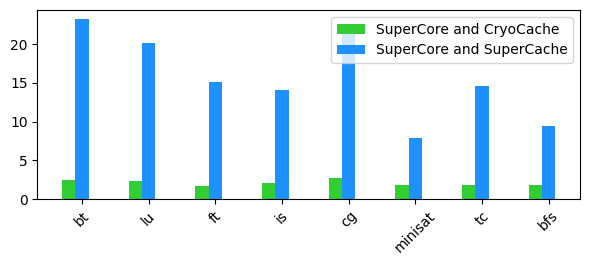

In [79]:
speedup()

                 Benchmark  L1D_cache_bandwidth_supercoresupercache
0  riscv-npb-bt-size-s-run                              7424.068746
1  riscv-npb-lu-size-s-run                              5042.561909
2  riscv-npb-ft-size-s-run                              3591.399007
3  riscv-npb-is-size-s-run                              1495.540239
4  riscv-npb-cg-size-s-run                              3574.847231
5   riscv-llvm-minisat-run                               968.815834
6       riscv-gapbs-tc-run                              2262.520219
7      riscv-gapbs-bfs-run                               772.258723


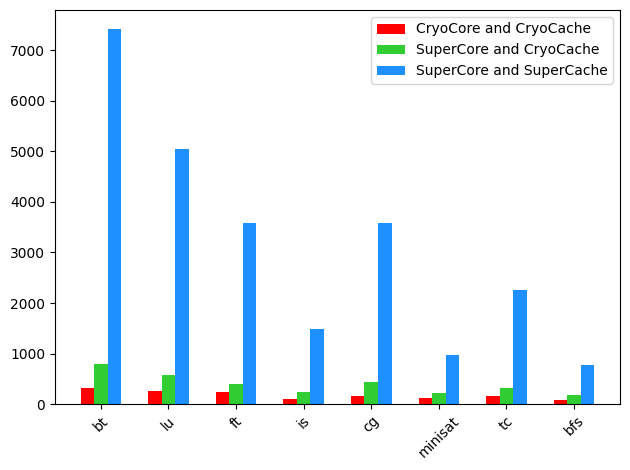

In [80]:
plot('L1D_cache_bandwidth')

                 Benchmark  L1I_cache_bandwidth_supercoresupercache
0  riscv-npb-bt-size-s-run                              1016.166775
1  riscv-npb-lu-size-s-run                               802.182988
2  riscv-npb-ft-size-s-run                               950.798809
3  riscv-npb-is-size-s-run                               565.163825
4  riscv-npb-cg-size-s-run                               257.377513
5   riscv-llvm-minisat-run                               526.316910
6       riscv-gapbs-tc-run                              1949.751956
7      riscv-gapbs-bfs-run                               663.751003


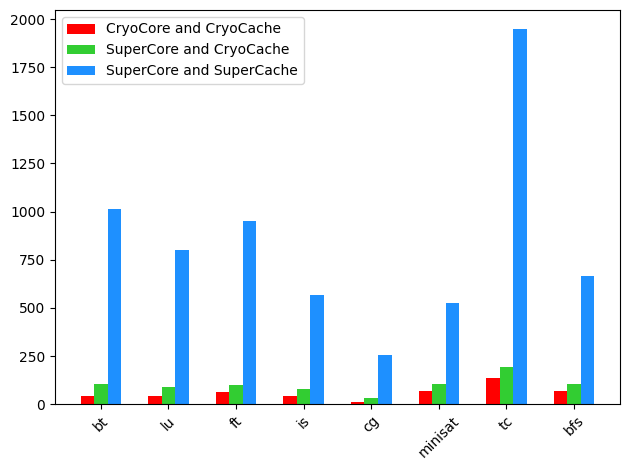

In [81]:
plot('L1I_cache_bandwidth')

                 Benchmark  L2_cache_bandwidth_supercoresupercache
0  riscv-npb-bt-size-s-run                              512.469435
1  riscv-npb-lu-size-s-run                             2529.947220
2  riscv-npb-ft-size-s-run                             3621.879214
3  riscv-npb-is-size-s-run                              333.443825
4  riscv-npb-cg-size-s-run                             1682.731106
5   riscv-llvm-minisat-run                              155.372138
6       riscv-gapbs-tc-run                              246.130896
7      riscv-gapbs-bfs-run                              178.727295


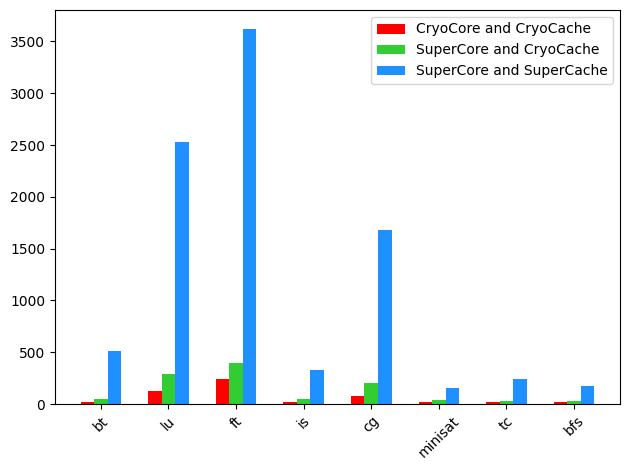

In [82]:
plot('L2_cache_bandwidth')

                 Benchmark  L3_cache_bandwidth_supercoresupercache
0  riscv-npb-bt-size-s-run                                2.846316
1  riscv-npb-lu-size-s-run                                6.969627
2  riscv-npb-ft-size-s-run                              402.817492
3  riscv-npb-is-size-s-run                               34.234900
4  riscv-npb-cg-size-s-run                             1587.061114
5   riscv-llvm-minisat-run                               92.013903
6       riscv-gapbs-tc-run                               13.869397
7      riscv-gapbs-bfs-run                               17.647660


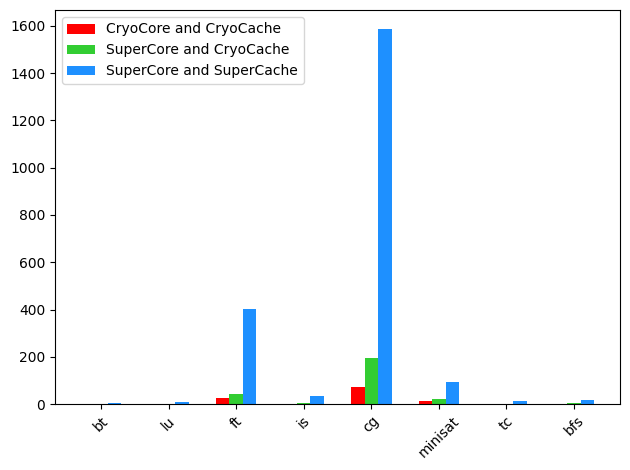

In [83]:
plot('L3_cache_bandwidth')

                 Benchmark  l3misses_supercoresupercache
0  riscv-npb-bt-size-s-run                          8894
1  riscv-npb-lu-size-s-run                          9575
2  riscv-npb-ft-size-s-run                        164332
3  riscv-npb-is-size-s-run                          9364
4  riscv-npb-cg-size-s-run                         21893
5   riscv-llvm-minisat-run                         52949
6       riscv-gapbs-tc-run                         10910
7      riscv-gapbs-bfs-run                          8759


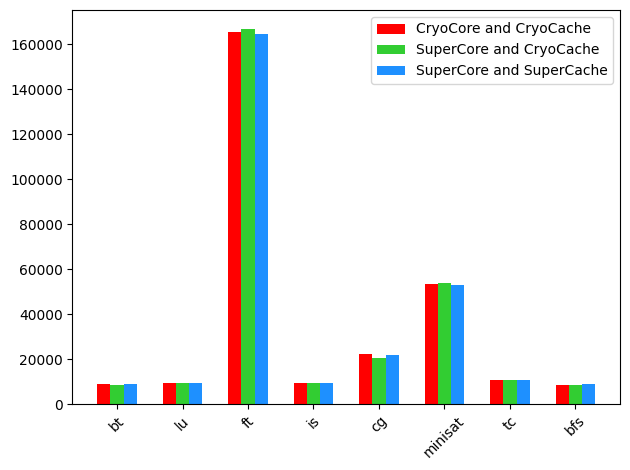

In [84]:
plot('l3misses')

                 Benchmark  lsqFullEvents_supercoresupercache
0  riscv-npb-bt-size-s-run                            3591825
1  riscv-npb-lu-size-s-run                            5278493
2  riscv-npb-ft-size-s-run                           10708478
3  riscv-npb-is-size-s-run                             750928
4  riscv-npb-cg-size-s-run                            7575164
5   riscv-llvm-minisat-run                            6607484
6       riscv-gapbs-tc-run                            4825459
7      riscv-gapbs-bfs-run                            4612771


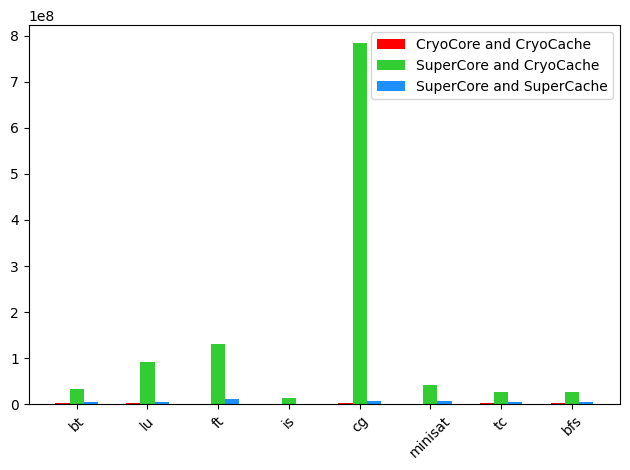

In [85]:
plot('lsqFullEvents')

                 Benchmark  l2hits_supercoresupercache
0  riscv-npb-bt-size-s-run                     1664965
1  riscv-npb-lu-size-s-run                     3800959
2  riscv-npb-ft-size-s-run                    23554085
3  riscv-npb-is-size-s-run                      235583
4  riscv-npb-cg-size-s-run                      909350
5   riscv-llvm-minisat-run                      161853
6       riscv-gapbs-tc-run                      118445
7      riscv-gapbs-bfs-run                       28480


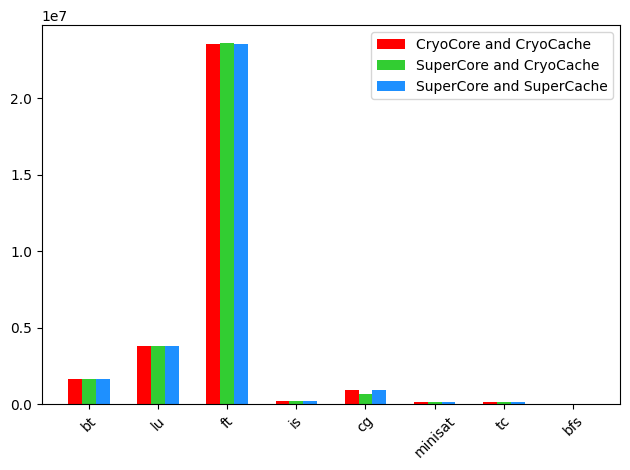

In [86]:
plot('l2hits')

                 Benchmark  l1dhits_supercoresupercache
0  riscv-npb-bt-size-s-run                    190799478
1  riscv-npb-lu-size-s-run                     53031589
2  riscv-npb-ft-size-s-run                    141468569
3  riscv-npb-is-size-s-run                      9123542
4  riscv-npb-cg-size-s-run                    107301384
5   riscv-llvm-minisat-run                     16761122
6       riscv-gapbs-tc-run                     15003735
7      riscv-gapbs-bfs-run                      3074517


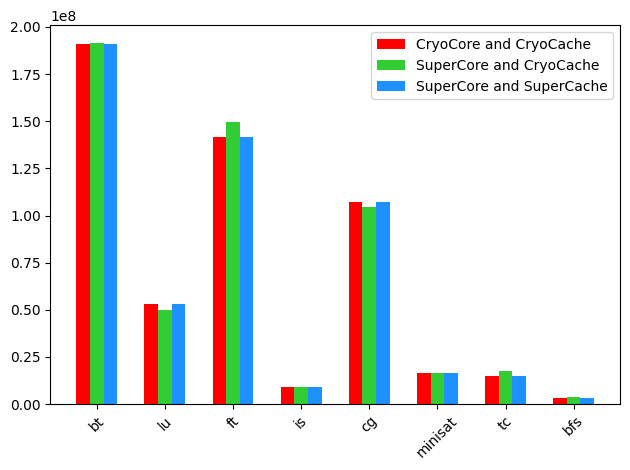

In [87]:
plot('l1dhits')

                 Benchmark  l1ihits_supercoresupercache
0  riscv-npb-bt-size-s-run                     26531190
1  riscv-npb-lu-size-s-run                      9657427
2  riscv-npb-ft-size-s-run                     55058035
3  riscv-npb-is-size-s-run                      3545478
4  riscv-npb-cg-size-s-run                      8428254
5   riscv-llvm-minisat-run                      9537981
6       riscv-gapbs-tc-run                     13321066
7      riscv-gapbs-bfs-run                      2724933


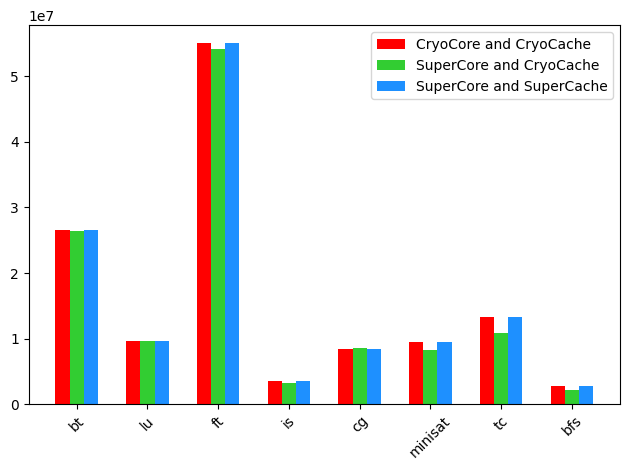

In [88]:
plot('l1ihits')

                 Benchmark  l2misses_supercoresupercache
0  riscv-npb-bt-size-s-run                          8568
1  riscv-npb-lu-size-s-run                          9774
2  riscv-npb-ft-size-s-run                       2664925
3  riscv-npb-is-size-s-run                         25962
4  riscv-npb-cg-size-s-run                       5984589
5   riscv-llvm-minisat-run                        190162
6       riscv-gapbs-tc-run                         91920
7      riscv-gapbs-bfs-run                         63397


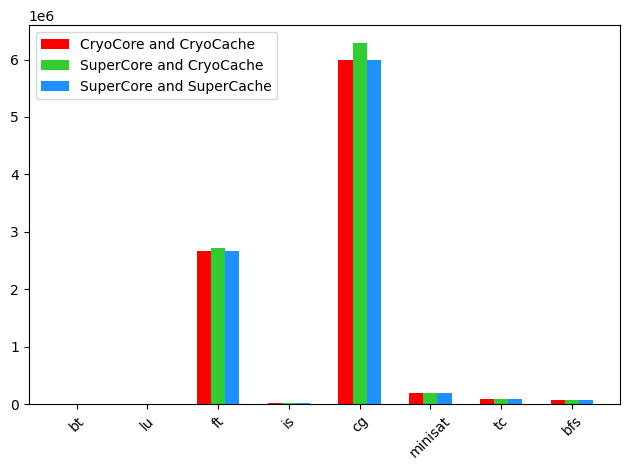

In [89]:
plot('l2misses')

                 Benchmark  L3_cache_miss_rate_supercoresupercache
0  riscv-npb-bt-size-s-run                                0.956859
1  riscv-npb-lu-size-s-run                                0.912078
2  riscv-npb-ft-size-s-run                                0.056355
3  riscv-npb-is-size-s-run                                0.348713
4  riscv-npb-cg-size-s-run                                0.003367
5   riscv-llvm-minisat-run                                0.253990
6       riscv-gapbs-tc-run                                0.920364
7      riscv-gapbs-bfs-run                                0.965498


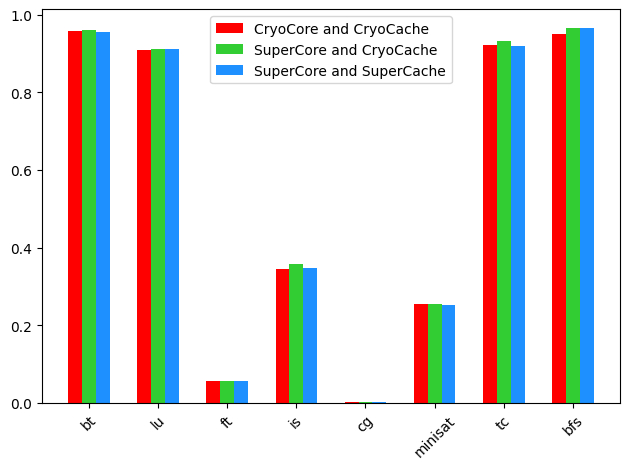

In [90]:
plot('L3_cache_miss_rate')

In [91]:
# open spec2006-simpoint--stats-cryocorecryocache.csv
df1 = pd.read_csv("in-orderbaseline.csv")
# open spec2006-simpoint--stats-supercorecryocache.csv
df2 = pd.read_csv("in-ordersupercorecryocache.csv")
# open spec2006-simpoint--stats-supercoresupercache.csv
df3 = pd.read_csv("in-ordersupercoresupercache.csv")

# rename Unnamed: 0 to Benchmark
df1.rename(columns={'Unnamed: 0': 'Benchmark'}, inplace=True)
df2.rename(columns={'Unnamed: 0': 'Benchmark'}, inplace=True)
df3.rename(columns={'Unnamed: 0': 'Benchmark'}, inplace=True)

# all columns append with _cryocorecryocache except Benchmark
df1.columns = [str(col) + '_cryocorecryocache' if col != 'Benchmark' else col for col in df1.columns]
# all columns append with _supercorecryocache except Benchmark
df2.columns = [str(col) + '_supercorecryocache' if col != 'Benchmark' else col for col in df2.columns]
# all columns append with _supercoresupercache except Benchmark
df3.columns = [str(col) + '_supercoresupercache' if col != 'Benchmark' else col for col in df3.columns]

# merge df1 and df2 on Benchmark
df = pd.merge(df1, df2, on='Benchmark')
# merge df and df3 on Benchmark
df = pd.merge(df, df3, on='Benchmark')

print(df.columns)

Index(['Benchmark', 'Cycles_cryocorecryocache',
       'Instructions_cryocorecryocache', 'IPC_cryocorecryocache',
       'Seconds_cryocorecryocache', 'l1dAccesses_cryocorecryocache',
       'l1iAccesses_cryocorecryocache', 'l2Accesses_cryocorecryocache',
       'l3Accesses_cryocorecryocache', 'l1dmisses_cryocorecryocache',
       'l1imisses_cryocorecryocache', 'l2misses_cryocorecryocache',
       'l3misses_cryocorecryocache', 'l1dhits_cryocorecryocache',
       'l1ihits_cryocorecryocache', 'l2hits_cryocorecryocache',
       'l3hits_cryocorecryocache', 'lsqFullEvents_cryocorecryocache',
       'Cycles_supercorecryocache', 'Instructions_supercorecryocache',
       'IPC_supercorecryocache', 'Seconds_supercorecryocache',
       'l1dAccesses_supercorecryocache', 'l1iAccesses_supercorecryocache',
       'l2Accesses_supercorecryocache', 'l3Accesses_supercorecryocache',
       'l1dmisses_supercorecryocache', 'l1imisses_supercorecryocache',
       'l2misses_supercorecryocache', 'l3misses_superc

In [92]:
df = add_bandwidths(df)

                 Benchmark  speedup_supercorecryocache  \
0  riscv-npb-cg-size-s-run                    1.277442   
1      riscv-gapbs-bfs-run                    1.449704   
2  riscv-npb-bt-size-s-run                    1.958429   
3  riscv-npb-lu-size-s-run                    1.587516   
4       riscv-gapbs-tc-run                    2.280305   
5   riscv-llvm-minisat-run                    1.427105   
6  riscv-npb-ft-size-s-run                    1.597771   
7  riscv-npb-is-size-s-run                    1.791752   

   speedup_supercoresupercache  
0                    23.225962  
1                     8.394004  
2                    24.285052  
3                    22.366603  
4                    16.613027  
5                     9.604876  
6                    19.724696  
7                    14.877604  


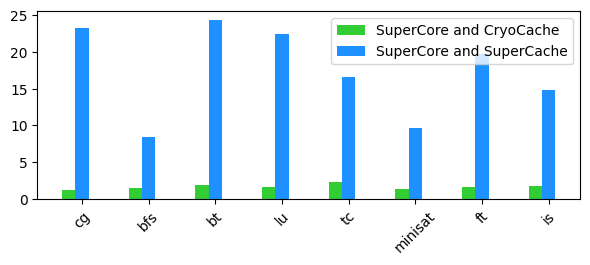

In [93]:
speedup()

                 Benchmark  L1D_cache_bandwidth_supercoresupercache
0  riscv-npb-cg-size-s-run                              1678.941382
1      riscv-gapbs-bfs-run                               486.050878
2  riscv-npb-bt-size-s-run                              2335.234906
3  riscv-npb-lu-size-s-run                              1913.103816
4       riscv-gapbs-tc-run                              1036.656705
5   riscv-llvm-minisat-run                               617.395226
6  riscv-npb-ft-size-s-run                              1486.243348
7  riscv-npb-is-size-s-run                              1025.643125


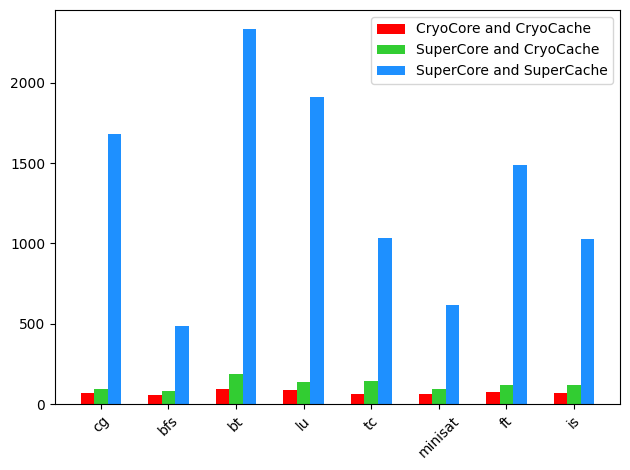

In [94]:
plot('L1D_cache_bandwidth')

In [95]:
# open spec2006-simpoint--stats-cryocorecryocache.csv
df1 = pd.read_csv("in-orderbaseline.csv")
# open spec2006-simpoint--stats-supercorecryocache.csv
df2 = pd.read_csv("in-ordersupercorecryocache.csv")
# open spec2006-simpoint--stats-supercoresupercache.csv
df3 = pd.read_csv("in-ordersupercoresupercache.csv")
# open spec2006-simpoint--stats-cryocorecryocache.csv
df4 = pd.read_csv("baseline.csv")
# open spec2006-simpoint--stats-supercorecryocache.csv
df5 = pd.read_csv("supercorecryocache.csv")
# open spec2006-simpoint--stats-supercoresupercache.csv
df6 = pd.read_csv("supercoresupercache.csv")

# rename Unnamed: 0 to Benchmark
df1.rename(columns={'Unnamed: 0': 'Benchmark'}, inplace=True)
df2.rename(columns={'Unnamed: 0': 'Benchmark'}, inplace=True)
df3.rename(columns={'Unnamed: 0': 'Benchmark'}, inplace=True)
df4.rename(columns={'Unnamed: 0': 'Benchmark'}, inplace=True)
df5.rename(columns={'Unnamed: 0': 'Benchmark'}, inplace=True)
df6.rename(columns={'Unnamed: 0': 'Benchmark'}, inplace=True)

# all columns append with _cryocorecryocache except Benchmark
df1.columns = [str(col) + '_inordercryocorecryocache' if col != 'Benchmark' else col for col in df1.columns]
# all columns append with _supercorecryocache except Benchmark
df2.columns = [str(col) + '_inordersupercorecryocache' if col != 'Benchmark' else col for col in df2.columns]
# all columns append with _supercoresupercache except Benchmark
df3.columns = [str(col) + '_inordersupercoresupercache' if col != 'Benchmark' else col for col in df3.columns]
# all columns append with _cryocorecryocache except Benchmark
df4.columns = [str(col) + '_cryocorecryocache' if col != 'Benchmark' else col for col in df4.columns]
# all columns append with _supercorecryocache except Benchmark
df5.columns = [str(col) + '_supercorecryocache' if col != 'Benchmark' else col for col in df5.columns]
# all columns append with _supercoresupercache except Benchmark
df6.columns = [str(col) + '_supercoresupercache' if col != 'Benchmark' else col for col in df6.columns]

# merge df1 and df2 on Benchmark
df = pd.merge(df1, df2, on='Benchmark')
# merge df and df3 on Benchmark
df = pd.merge(df, df3, on='Benchmark')
# merge df and df4 on Benchmark
df = pd.merge(df, df4, on='Benchmark')
# merge df and df5 on Benchmark
df = pd.merge(df, df5, on='Benchmark')
# merge df and df6 on Benchmark
df = pd.merge(df, df6, on='Benchmark')

print(df.columns)

Index(['Benchmark', 'Cycles_inordercryocorecryocache',
       'Instructions_inordercryocorecryocache', 'IPC_inordercryocorecryocache',
       'Seconds_inordercryocorecryocache',
       'l1dAccesses_inordercryocorecryocache',
       'l1iAccesses_inordercryocorecryocache',
       'l2Accesses_inordercryocorecryocache',
       'l3Accesses_inordercryocorecryocache',
       'l1dmisses_inordercryocorecryocache',
       ...
       'l3Accesses_supercoresupercache', 'l1dmisses_supercoresupercache',
       'l1imisses_supercoresupercache', 'l2misses_supercoresupercache',
       'l3misses_supercoresupercache', 'l1dhits_supercoresupercache',
       'l1ihits_supercoresupercache', 'l2hits_supercoresupercache',
       'l3hits_supercoresupercache', 'lsqFullEvents_supercoresupercache'],
      dtype='object', length=103)


In [96]:
df['L1D_cache_bandwidth_cryocorecryocache'] = df['l1dAccesses_cryocorecryocache'] * 8 / df['Seconds_cryocorecryocache']
df['L1D_cache_bandwidth_supercorecryocache'] = df['l1dAccesses_supercorecryocache'] * 8 / df['Seconds_supercorecryocache']
df['L1D_cache_bandwidth_supercoresupercache'] = df['l1dAccesses_supercoresupercache'] * 8 / df['Seconds_supercoresupercache']
df['L1D_cache_bandwidth_inordercryocorecryocache'] = df['l1dAccesses_inordercryocorecryocache'] * 8 / df['Seconds_inordercryocorecryocache']
df['L1D_cache_bandwidth_inordersupercorecryocache'] = df['l1dAccesses_inordersupercorecryocache'] * 8 / df['Seconds_inordersupercorecryocache']
df['L1D_cache_bandwidth_inordersupercoresupercache'] = df['l1dAccesses_inordersupercoresupercache'] * 8 / df['Seconds_inordersupercoresupercache']

df['L1I_cache_bandwidth_cryocorecryocache'] = df['l1iAccesses_cryocorecryocache'] * 8 / df['Seconds_cryocorecryocache']
df['L1I_cache_bandwidth_supercorecryocache'] = df['l1iAccesses_supercorecryocache'] * 8 / df['Seconds_supercorecryocache']
df['L1I_cache_bandwidth_supercoresupercache'] = df['l1iAccesses_supercoresupercache'] * 8 / df['Seconds_supercoresupercache']
df['L1I_cache_bandwidth_inordercryocorecryocache'] = df['l1iAccesses_inordercryocorecryocache'] * 8 / df['Seconds_inordercryocorecryocache']
df['L1I_cache_bandwidth_inordersupercorecryocache'] = df['l1iAccesses_inordersupercorecryocache'] * 8 / df['Seconds_inordersupercorecryocache']
df['L1I_cache_bandwidth_inordersupercoresupercache'] = df['l1iAccesses_inordersupercoresupercache'] * 8 / df['Seconds_inordersupercoresupercache']

df['L2_cache_bandwidth_cryocorecryocache'] = df['l2Accesses_cryocorecryocache'] * 64 / df['Seconds_cryocorecryocache']
df['L2_cache_bandwidth_supercorecryocache'] = df['l2Accesses_supercorecryocache'] * 64 / df['Seconds_supercorecryocache']
df['L2_cache_bandwidth_supercoresupercache'] = df['l2Accesses_supercoresupercache'] * 64 / df['Seconds_supercoresupercache']
df['L2_cache_bandwidth_inordercryocorecryocache'] = df['l2Accesses_inordercryocorecryocache'] * 64 / df['Seconds_inordercryocorecryocache']
df['L2_cache_bandwidth_inordersupercorecryocache'] = df['l2Accesses_inordersupercorecryocache'] * 64 / df['Seconds_inordersupercorecryocache']
df['L2_cache_bandwidth_inordersupercoresupercache'] = df['l2Accesses_inordersupercoresupercache'] * 64 / df['Seconds_inordersupercoresupercache']

df['L3_cache_bandwidth_cryocorecryocache'] = df['l3Accesses_cryocorecryocache'] * 64 / df['Seconds_cryocorecryocache']
df['L3_cache_bandwidth_supercorecryocache'] = df['l3Accesses_supercorecryocache'] * 64 / df['Seconds_supercorecryocache']
df['L3_cache_bandwidth_supercoresupercache'] = df['l3Accesses_supercoresupercache'] * 64 / df['Seconds_supercoresupercache']
df['L3_cache_bandwidth_inordercryocorecryocache'] = df['l3Accesses_inordercryocorecryocache'] * 64 / df['Seconds_inordercryocorecryocache']
df['L3_cache_bandwidth_inordersupercorecryocache'] = df['l3Accesses_inordersupercorecryocache'] * 64 / df['Seconds_inordersupercorecryocache']
df['L3_cache_bandwidth_inordersupercoresupercache'] = df['l3Accesses_inordersupercoresupercache'] * 64 / df['Seconds_inordersupercoresupercache']

df['L1D_cache_bandwidth_cryocorecryocache'] *= 10e-9
df['L1D_cache_bandwidth_supercorecryocache'] *= 10e-9
df['L1D_cache_bandwidth_supercoresupercache'] *= 10e-9
df['L1D_cache_bandwidth_inordercryocorecryocache'] *= 10e-9
df['L1D_cache_bandwidth_inordersupercorecryocache'] *= 10e-9
df['L1D_cache_bandwidth_inordersupercoresupercache'] *= 10e-9

df['L1I_cache_bandwidth_cryocorecryocache'] *= 10e-9
df['L1I_cache_bandwidth_supercorecryocache'] *= 10e-9
df['L1I_cache_bandwidth_supercoresupercache'] *= 10e-9
df['L1I_cache_bandwidth_inordercryocorecryocache'] *= 10e-9
df['L1I_cache_bandwidth_inordersupercorecryocache'] *= 10e-9
df['L1I_cache_bandwidth_inordersupercoresupercache'] *= 10e-9

df['L2_cache_bandwidth_cryocorecryocache'] *= 10e-9
df['L2_cache_bandwidth_supercorecryocache'] *= 10e-9
df['L2_cache_bandwidth_supercoresupercache'] *= 10e-9
df['L2_cache_bandwidth_inordercryocorecryocache'] *= 10e-9
df['L2_cache_bandwidth_inordersupercorecryocache'] *= 10e-9
df['L2_cache_bandwidth_inordersupercoresupercache'] *= 10e-9

df['L3_cache_bandwidth_cryocorecryocache'] *= 10e-9
df['L3_cache_bandwidth_supercorecryocache'] *= 10e-9
df['L3_cache_bandwidth_supercoresupercache'] *= 10e-9
df['L3_cache_bandwidth_inordercryocorecryocache'] *= 10e-9
df['L3_cache_bandwidth_inordersupercorecryocache'] *= 10e-9
df['L3_cache_bandwidth_inordersupercoresupercache'] *= 10e-9

df['IPC_cryocorecryocache'] = df['Instructions_cryocorecryocache'] / df['Cycles_cryocorecryocache']
df['IPC_supercorecryocache'] = df['Instructions_supercorecryocache'] / df['Cycles_supercorecryocache']
df['IPC_supercoresupercache'] = df['Instructions_supercoresupercache'] / df['Cycles_supercoresupercache']
df['IPC_inordercryocorecryocache'] = df['Instructions_inordercryocorecryocache'] / df['Cycles_inordercryocorecryocache']
df['IPC_inordersupercorecryocache'] = df['Instructions_inordersupercorecryocache'] / df['Cycles_inordersupercorecryocache']
df['IPC_inordersupercoresupercache'] = df['Instructions_inordersupercoresupercache'] / df['Cycles_inordersupercoresupercache']

df['L1D_cache_miss_rate_cryocorecryocache'] = df['l1dmisses_cryocorecryocache'] / df['l1dAccesses_cryocorecryocache']
df['L1D_cache_miss_rate_supercorecryocache'] = df['l1dmisses_supercorecryocache'] / df['l1dAccesses_supercorecryocache']
df['L1D_cache_miss_rate_supercoresupercache'] = df['l1dmisses_supercoresupercache'] / df['l1dAccesses_supercoresupercache']
df['L1D_cache_miss_rate_inordercryocorecryocache'] = df['l1dmisses_inordercryocorecryocache'] / df['l1dAccesses_inordercryocorecryocache']
df['L1D_cache_miss_rate_inordersupercorecryocache'] = df['l1dmisses_inordersupercorecryocache'] / df['l1dAccesses_inordersupercorecryocache']
df['L1D_cache_miss_rate_inordersupercoresupercache'] = df['l1dmisses_inordersupercoresupercache'] / df['l1dAccesses_inordersupercoresupercache']

df['L1I_cache_miss_rate_cryocorecryocache'] = df['l1imisses_cryocorecryocache'] / df['l1iAccesses_cryocorecryocache']
df['L1I_cache_miss_rate_supercorecryocache'] = df['l1imisses_supercorecryocache'] / df['l1iAccesses_supercorecryocache']
df['L1I_cache_miss_rate_supercoresupercache'] = df['l1imisses_supercoresupercache'] / df['l1iAccesses_supercoresupercache']
df['L1I_cache_miss_rate_inordercryocorecryocache'] = df['l1imisses_inordercryocorecryocache'] / df['l1iAccesses_inordercryocorecryocache']
df['L1I_cache_miss_rate_inordersupercorecryocache'] = df['l1imisses_inordersupercorecryocache'] / df['l1iAccesses_inordersupercorecryocache']
df['L1I_cache_miss_rate_inordersupercoresupercache'] = df['l1imisses_inordersupercoresupercache'] / df['l1iAccesses_inordersupercoresupercache']

df['L2_cache_miss_rate_cryocorecryocache'] = df['l2misses_cryocorecryocache'] / df['l2Accesses_cryocorecryocache']
df['L2_cache_miss_rate_supercorecryocache'] = df['l2misses_supercorecryocache'] / df['l2Accesses_supercorecryocache']
df['L2_cache_miss_rate_supercoresupercache'] = df['l2misses_supercoresupercache'] / df['l2Accesses_supercoresupercache']
df['L2_cache_miss_rate_inordercryocorecryocache'] = df['l2misses_inordercryocorecryocache'] / df['l2Accesses_inordercryocorecryocache']
df['L2_cache_miss_rate_inordersupercorecryocache'] = df['l2misses_inordersupercorecryocache'] / df['l2Accesses_inordersupercorecryocache']
df['L2_cache_miss_rate_inordersupercoresupercache'] = df['l2misses_inordersupercoresupercache'] / df['l2Accesses_inordersupercoresupercache']

df['L3_cache_miss_rate_cryocorecryocache'] = df['l3misses_cryocorecryocache'] / df['l3Accesses_cryocorecryocache']
df['L3_cache_miss_rate_supercorecryocache'] = df['l3misses_supercorecryocache'] / df['l3Accesses_supercorecryocache']
df['L3_cache_miss_rate_supercoresupercache'] = df['l3misses_supercoresupercache'] / df['l3Accesses_supercoresupercache']
df['L3_cache_miss_rate_inordercryocorecryocache'] = df['l3misses_inordercryocorecryocache'] / df['l3Accesses_inordercryocorecryocache']
df['L3_cache_miss_rate_inordersupercorecryocache'] = df['l3misses_inordersupercorecryocache'] / df['l3Accesses_inordersupercorecryocache']
df['L3_cache_miss_rate_inordersupercoresupercache'] = df['l3misses_inordersupercoresupercache'] / df['l3Accesses_inordersupercoresupercache']

df['normalized_l3misses_cryocorecryocache'] = df['l3misses_cryocorecryocache'] / df['Instructions_cryocorecryocache']
df['normalized_l3misses_supercorecryocache'] = df['l3misses_supercorecryocache'] / df['Instructions_supercorecryocache']
df['normalized_l3misses_supercoresupercache'] = df['l3misses_supercoresupercache'] / df['Instructions_supercoresupercache']
df['normalized_l3misses_inordercryocorecryocache'] = df['l3misses_inordercryocorecryocache'] / df['Instructions_inordercryocorecryocache']
df['normalized_l3misses_inordersupercorecryocache'] = df['l3misses_inordersupercorecryocache'] / df['Instructions_inordersupercorecryocache']
df['normalized_l3misses_inordersupercoresupercache'] = df['l3misses_inordersupercoresupercache'] / df['Instructions_inordersupercoresupercache']

df['l3_cache_MPKI_cryocorecryocache'] = df['l3misses_cryocorecryocache'] / df['Instructions_cryocorecryocache'] * 1000
df['l3_cache_MPKI_supercorecryocache'] = df['l3misses_supercorecryocache'] / df['Instructions_supercorecryocache'] * 1000
df['l3_cache_MPKI_supercoresupercache'] = df['l3misses_supercoresupercache'] / df['Instructions_supercoresupercache'] * 1000
df['l3_cache_MPKI_inordercryocorecryocache'] = df['l3misses_inordercryocorecryocache'] / df['Instructions_inordercryocorecryocache'] * 1000
df['l3_cache_MPKI_inordersupercorecryocache'] = df['l3misses_inordersupercorecryocache'] / df['Instructions_inordersupercorecryocache'] * 1000
df['l3_cache_MPKI_inordersupercoresupercache'] = df['l3misses_inordersupercoresupercache'] / df['Instructions_inordersupercoresupercache'] * 1000



In [97]:
def speedup():
    # Plot speedup
    plt.figure(figsize=(20,10))

    # Define width of each bar
    bar_width = 0.2

    # Calculate offset for each set of bars
    offset = np.arange(len(df['Benchmark'])) * 1.5

    # Speedup is old / new seconds
    df['speedup_supercorecryocache'] = df['Seconds_cryocorecryocache'] / df['Seconds_supercorecryocache']
    df['speedup_supercoresupercache'] = df['Seconds_cryocorecryocache'] / df['Seconds_supercoresupercache']
    df['speedup_inordercryocorecryocache'] = df['Seconds_cryocorecryocache'] / df['Seconds_inordercryocorecryocache']
    df['speedup_inordersupercorecryocache'] = df['Seconds_cryocorecryocache'] / df['Seconds_inordersupercorecryocache']
    df['speedup_inordersupercoresupercache'] = df['Seconds_cryocorecryocache'] / df['Seconds_inordersupercoresupercache']

    # Print speedup for each benchmark
    print(df[['Benchmark', 'speedup_supercorecryocache', 'speedup_supercoresupercache', 'speedup_inordersupercorecryocache', 'speedup_inordersupercoresupercache']])

    # Plot each set of bars with appropriate offset
    bars1 = plt.bar(offset - bar_width, df['speedup_supercorecryocache'], width=bar_width, label='SuperCore and CryoCache', color='limegreen')
    bars2 = plt.bar(offset, df['speedup_supercoresupercache'], width=bar_width, label='SuperCore and SuperCache', color='dodgerblue')
    bars3 = plt.bar(offset + bar_width, df['speedup_inordercryocorecryocache'], width=bar_width, label='In-Order CryoCore and CryoCache', color='r')
    bars4 = plt.bar(offset + 2*bar_width, df['speedup_inordersupercorecryocache'], width=bar_width, label='In-Order SuperCore and CryoCache', color='orange')
    bars5 = plt.bar(offset + 3*bar_width, df['speedup_inordersupercoresupercache'], width=bar_width, label='In-Order SuperCore and SuperCache', color='purple')

    # Function to annotate bars with their values
    def annotate_bars(bars):
        for bar in bars:
            height = bar.get_height()
            # Use format string to ensure one decimal place without scientific notation
            if height >= 10:
                plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom', fontsize=11)
            else:
                plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=11)

    # Annotate each set of bars
    annotate_bars(bars1)
    annotate_bars(bars2)
    annotate_bars(bars3)
    annotate_bars(bars4)
    annotate_bars(bars5)

    # Extract sorted labels and speedup values
    labels = [benchmark.split('-')[2] for benchmark in df['Benchmark']]
    plt.xticks(ticks=offset, labels=labels, rotation=45)  # Set x-axis ticks and labels
    plt.legend()  # Show legend
    plt.title('Speedup')  # Set plot title
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plot


                 Benchmark  speedup_supercorecryocache  \
0  riscv-npb-cg-size-s-run                    2.726600   
1      riscv-gapbs-bfs-run                    1.828014   
2  riscv-npb-bt-size-s-run                    2.455571   
3  riscv-npb-lu-size-s-run                    2.292969   
4       riscv-gapbs-tc-run                    1.790123   
5   riscv-llvm-minisat-run                    1.824779   
6  riscv-npb-ft-size-s-run                    1.635941   
7  riscv-npb-is-size-s-run                    2.136515   

   speedup_supercoresupercache  speedup_inordersupercorecryocache  \
0                    22.330664                           0.573422   
1                     9.401216                           1.143861   
2                    23.231579                           0.585899   
3                    20.094398                           0.527791   
4                    14.579525                           1.048514   
5                     7.821379                           0.8557

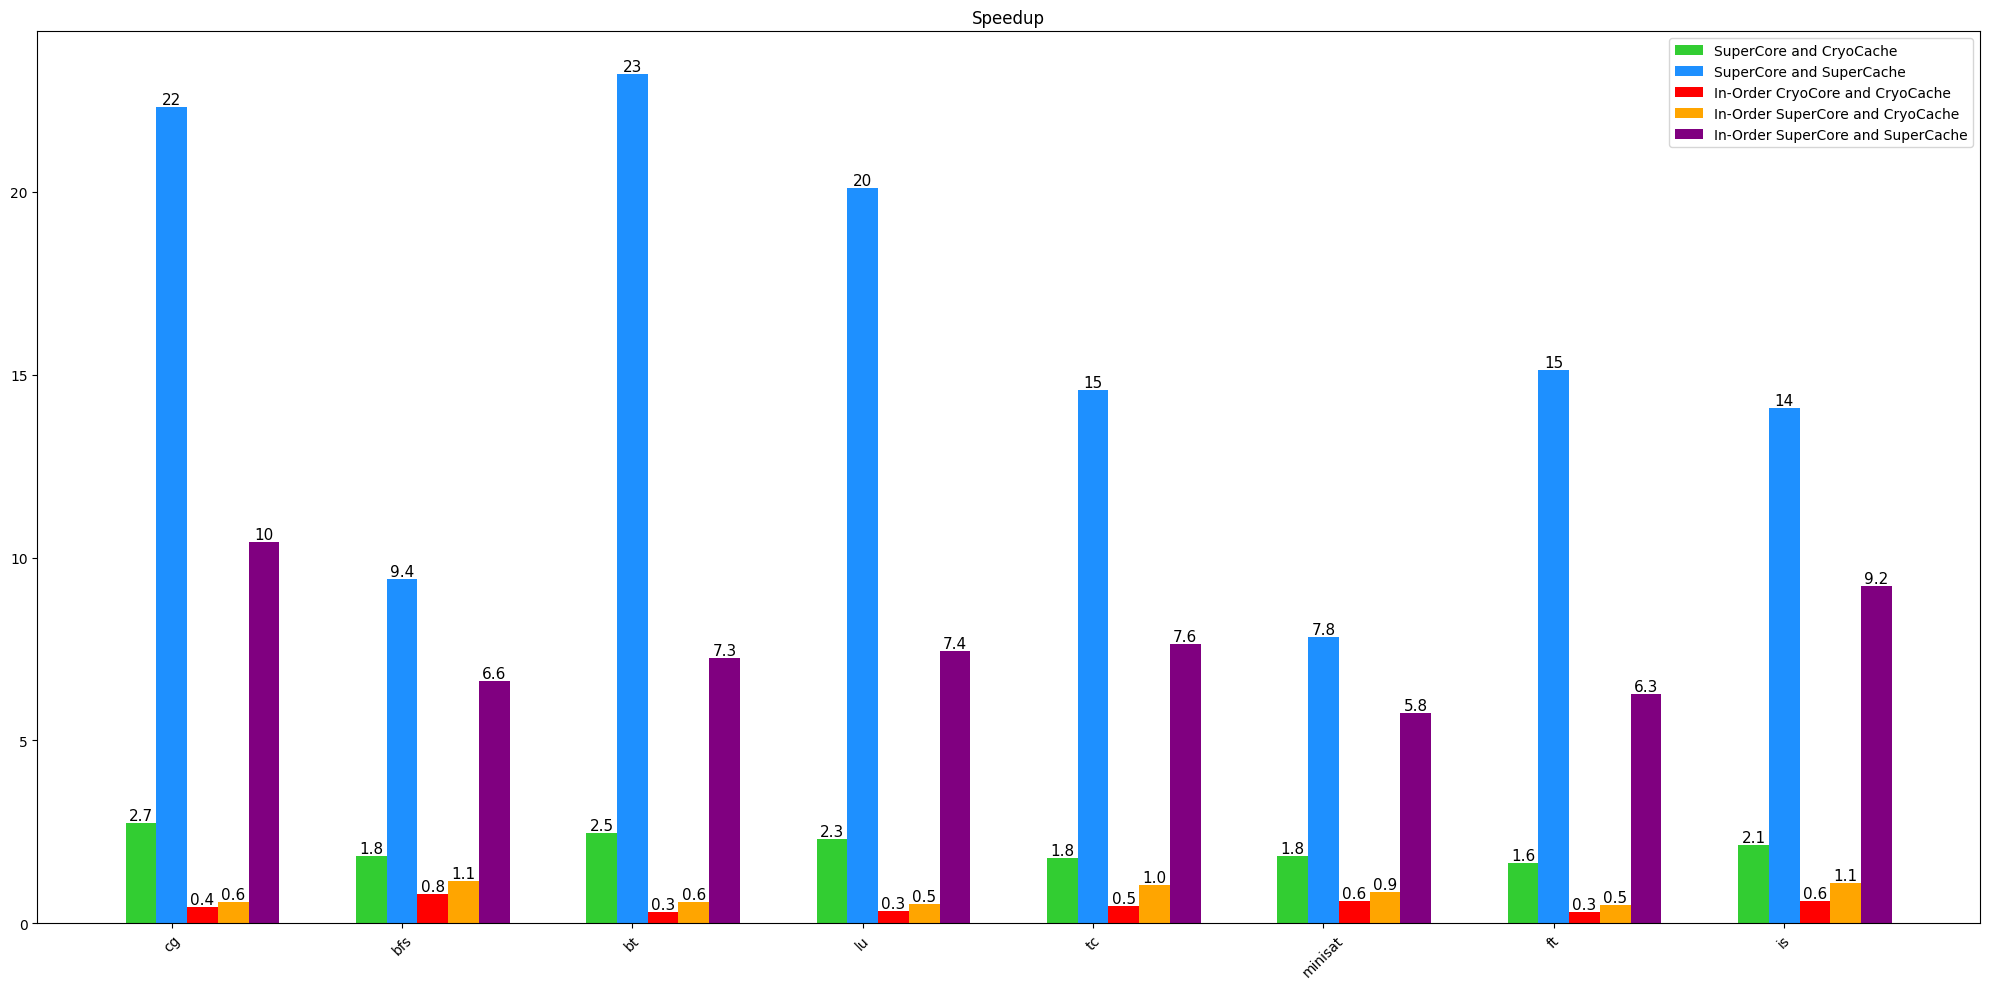

In [98]:
speedup()

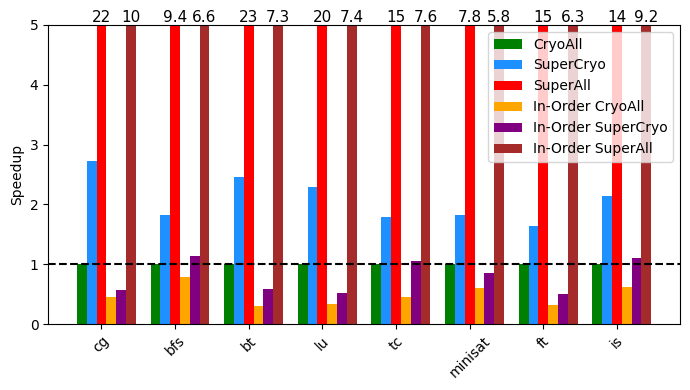

In [99]:
def plot_speedup():
    # 3.5 inches by 2 inches plot
    plt.figure(figsize=(7, 4))
    # pairwisely compare the speedup of the three configurations
    bar_width = 0.2
    offset = np.arange(len(df['Benchmark'])) * 1.5
    df['speedup_cryocorecryocache'] = df['Seconds_cryocorecryocache'] / df['Seconds_cryocorecryocache']
    df['speedup_supercorecryocache'] = df['Seconds_cryocorecryocache'] / df['Seconds_supercorecryocache']
    df['speedup_supercoresupercache'] = df['Seconds_cryocorecryocache'] / df['Seconds_supercoresupercache']
    df['speedup_inordercryocorecryocache'] = df['Seconds_cryocorecryocache'] / df['Seconds_inordercryocorecryocache']
    df['speedup_inordersupercorecryocache'] = df['Seconds_cryocorecryocache'] / df['Seconds_inordersupercorecryocache']
    df['speedup_inordersupercoresupercache'] = df['Seconds_cryocorecryocache'] / df['Seconds_inordersupercoresupercache']

    bars1 = plt.bar(offset - 2 * bar_width, np.minimum(df['speedup_cryocorecryocache'], 5), width=bar_width, label='CryoAll', color='green')
    bars2 = plt.bar(offset - bar_width, np.minimum(df['speedup_supercorecryocache'], 5), width=bar_width, label='SuperCryo', color='dodgerblue')
    bars3 = plt.bar(offset, np.minimum(df['speedup_supercoresupercache'], 5), width=bar_width, label='SuperAll', color='red')
    bars4 = plt.bar(offset + 1 * bar_width, np.minimum(df['speedup_inordercryocorecryocache'], 5), width=bar_width, label='In-Order CryoAll', color='orange')
    bars5 = plt.bar(offset + 2 * bar_width, np.minimum(df['speedup_inordersupercorecryocache'], 5), width=bar_width, label='In-Order SuperCryo', color='purple')
    bars6 = plt.bar(offset + 3 * bar_width, np.minimum(df['speedup_inordersupercoresupercache'], 5), width=bar_width, label='In-Order SuperAll', color='brown')

    # horizontal black dotted line at y=1
    plt.axhline(y=1, color='black', linestyle='--')

    def annotate_bars(bars, heights):
        for bar, height in zip(bars, heights):
            display_height = bar.get_height()
            if display_height >= 5:
                display_text = f'{height:.1f}'
                # add space to display_text if it has three digits
                # if display_text has three digits, reduce the font size
                if len(display_text) == 4:
                    display_text = display_text + ' ' if len(display_text) == 4 else display_text
                    plt.text(bar.get_x() + bar.get_width() / 2, display_height, f'{height:.0f}', ha='center', va='bottom', fontsize=11)
                else:
                    plt.text(bar.get_x() + bar.get_width() / 2, display_height, f'{height:.1f}', ha='center', va='bottom', fontsize=11)
            else:
                pass
                # plt.text(bar.get_x() + bar.get_width() / 2, display_height, f'{height:.1f}', ha='center', va='bottom', fontsize=11)

    annotate_bars(bars1, df['speedup_cryocorecryocache'])
    annotate_bars(bars2, df['speedup_supercorecryocache'])
    annotate_bars(bars3, df['speedup_supercoresupercache'])
    annotate_bars(bars4, df['speedup_inordercryocorecryocache'])
    annotate_bars(bars5, df['speedup_inordersupercorecryocache'])
    annotate_bars(bars6, df['speedup_inordersupercoresupercache'])

    labels = [benchmark.split('-')[2] for benchmark in df['Benchmark']]
    plt.xticks(ticks=offset, labels=labels, rotation=45)
    # limit y-axis to 5
    plt.ylim(0, 5)
    # y label
    plt.ylabel('Speedup')
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.savefig('speedup_workloads.pdf', bbox_inches='tight')
    plt.show()

plot_speedup()


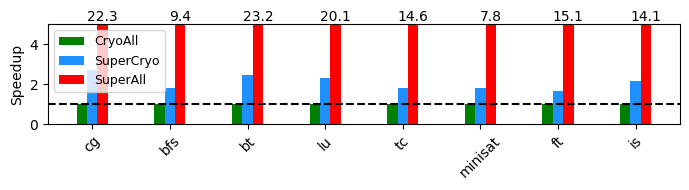

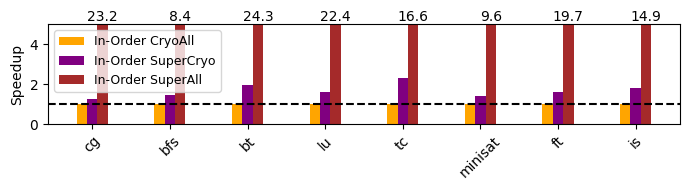

In [100]:
def separate_speedups():
    def annotate_bars(bars, heights):
        for bar, height in zip(bars, heights):
            display_height = bar.get_height()
            if display_height >= 5:
                plt.text(bar.get_x() + bar.get_width() / 2, display_height, f'{height:.1f}', ha='center', va='bottom', fontsize=10)
            else:
                pass
                #plt.text(bar.get_x() + bar.get_width() / 2, display_height, f'{height:.1f}', ha='center', va='bottom', fontsize=9)

    # Out-of-order speedups
    plt.figure(figsize=(7, 2))
    bar_width = 0.2
    offset = np.arange(len(df['Benchmark'])) * 1.5
    df['speedup_cryocorecryocache'] = df['Seconds_cryocorecryocache'] / df['Seconds_cryocorecryocache']
    df['speedup_supercorecryocache'] = df['Seconds_cryocorecryocache'] / df['Seconds_supercorecryocache']
    df['speedup_supercoresupercache'] = df['Seconds_cryocorecryocache'] / df['Seconds_supercoresupercache']

    plot1 = plt.bar(offset - bar_width, np.minimum(df['speedup_cryocorecryocache'], 5), width=bar_width, label='CryoAll', color='green')
    plot2 = plt.bar(offset, np.minimum(df['speedup_supercorecryocache'], 5), width=bar_width, label='SuperCryo', color='dodgerblue')
    plot3 = plt.bar(offset + bar_width, np.minimum(df['speedup_supercoresupercache'], 5), width=bar_width, label='SuperAll', color='red')
    labels = [benchmark.split('-')[2] for benchmark in df['Benchmark']]
    plt.axhline(y=1, color='black', linestyle='--')
    plt.xticks(ticks=offset, labels=labels, rotation=45)
    plt.legend(fontsize=9)
    # set y-axis limit to 5
    plt.ylim(0, 5)
    # add y-axis label
    plt.ylabel('Speedup')
    annotate_bars(plot1, df['speedup_cryocorecryocache'])
    annotate_bars(plot2, df['speedup_supercorecryocache'])
    annotate_bars(plot3, df['speedup_supercoresupercache'])
    plt.tight_layout()
    plt.savefig('speedup_workloads_outoforder.pdf', bbox_inches='tight')
    plt.show()

    # In-order speedups
    plt.figure(figsize=(7, 2))
    bar_width = 0.2
    offset = np.arange(len(df['Benchmark'])) * 1.5
    df['speedup_inordercryocorecryocache'] = df['Seconds_inordercryocorecryocache'] / df['Seconds_inordercryocorecryocache']
    df['speedup_inordersupercorecryocache'] = df['Seconds_inordercryocorecryocache'] / df['Seconds_inordersupercorecryocache']
    df['speedup_inordersupercoresupercache'] = df['Seconds_inordercryocorecryocache'] / df['Seconds_inordersupercoresupercache']

    plot4 = plt.bar(offset - bar_width, np.minimum(df['speedup_inordercryocorecryocache'], 5), width=bar_width, label='In-Order CryoAll', color='orange')
    plot5 = plt.bar(offset, np.minimum(df['speedup_inordersupercorecryocache'], 5), width=bar_width, label='In-Order SuperCryo', color='purple')
    plot6 = plt.bar(offset + bar_width, np.minimum(df['speedup_inordersupercoresupercache'], 5), width=bar_width, label='In-Order SuperAll', color='brown')
    labels = [benchmark.split('-')[2] for benchmark in df['Benchmark']]
    plt.axhline(y=1, color='black', linestyle='--')
    plt.xticks(ticks=offset, labels=labels, rotation=45)
    plt.legend(fontsize=9)
    annotate_bars(plot4, df['speedup_inordercryocorecryocache'])
    annotate_bars(plot5, df['speedup_inordersupercorecryocache'])
    annotate_bars(plot6, df['speedup_inordersupercoresupercache'])
    # set y-axis limit to 5
    plt.ylim(0, 5)
    # add y-axis label
    plt.ylabel('Speedup')
    plt.tight_layout()
    plt.savefig('speedup_workloads_inorder.pdf', bbox_inches='tight')
    plt.show()

separate_speedups()


In [101]:
def plot(stat):
    plt.figure(figsize=(7, 4))
    
    # Define width of each bar
    bar_width = 0.15
    
    # Calculate offset for each set of bars with additional space between benchmarks
    offset = np.arange(len(df['Benchmark'])) * (bar_width * 8)
    
    # Print the stat's value for each benchmark
    print(df[['Benchmark', stat + '_cryocorecryocache', stat + '_supercorecryocache', stat + '_supercoresupercache', stat + '_inordercryocorecryocache', stat + '_inordersupercorecryocache', stat + '_inordersupercoresupercache']])
    
    if 'bandwidth' not in stat:
        # Plot each set of bars with appropriate offset
        plt.bar(offset - 2.5 * bar_width, df[stat + '_cryocorecryocache'], width=bar_width, label='CryoAll', color='green')
        plt.bar(offset - 1.5 * bar_width, df[stat + '_supercorecryocache'], width=bar_width, label='SuperCryo', color='dodgerblue')
        plt.bar(offset - 0.5 * bar_width, df[stat + '_supercoresupercache'], width=bar_width, label='SuperAll', color='r')
        plt.bar(offset + 0.5 * bar_width, df[stat + '_inordercryocorecryocache'], width=bar_width, label='In-order CryoAll', color='orange')
        plt.bar(offset + 1.5 * bar_width, df[stat + '_inordersupercorecryocache'], width=bar_width, label='In-order SuperCryo', color='purple')
        plt.bar(offset + 2.5 * bar_width, df[stat + '_inordersupercoresupercache'], width=bar_width, label='In-order SuperAll', color='brown')
    
    elif 'misses' in stat:
        # Plot each set of bars with appropriate offset
        plt.bar(offset - 2.5 * bar_width, df[stat + '_cryocorecryocache']/1000, width=bar_width, label='CryoAll', color='green')
        plt.bar(offset - 1.5 * bar_width, df[stat + '_supercorecryocache']/1000, width=bar_width, label='SuperCryo', color='dodgerblue')
        plt.bar(offset - 0.5 * bar_width, df[stat + '_supercoresupercache']/1000, width=bar_width, label='SuperAll', color='r')
        plt.bar(offset + 0.5 * bar_width, df[stat + '_inordercryocorecryocache']/1000, width=bar_width, label='In-order CryoAll', color='orange')
        plt.bar(offset + 1.5 * bar_width, df[stat + '_inordersupercorecryocache']/1000, width=bar_width, label='In-order SuperCryo', color='purple')
        plt.bar(offset + 2.5 * bar_width, df[stat + '_inordersupercoresupercache']/1000, width=bar_width, label='In-order SuperAll', color='brown')
    else:
        # do all except supercore configs
        plt.bar(offset - 1.5 * bar_width, df[stat + '_cryocorecryocache'], width=bar_width, label='CryoAll', color='green')
        plt.bar(offset - 0.5 * bar_width, df[stat + '_supercorecryocache'], width=bar_width, label='SuperCryo', color='dodgerblue')
        plt.bar(offset + 0.5 * bar_width, df[stat + '_inordercryocorecryocache'], width=bar_width, label='In-order CryoAll', color='orange')
        plt.bar(offset + 1.5 * bar_width, df[stat + '_inordersupercorecryocache'], width=bar_width, label='In-order SuperCryo', color='purple')

    # Generate labels from benchmarks
    labels = [benchmark.split('-')[2] for benchmark in df['Benchmark']]

    # set y-lim to 3000 for 
    
    # Set x-ticks and labels
    plt.xticks(ticks=offset, labels=labels, rotation=45)
    plt.legend()  # Show legend
    if 'bandwidth' in stat:
        plt.ylabel(stat.replace('_', ' ').title() + ' (GB/s)')
    elif 'MPKI' in stat:
        plt.ylabel(stat.replace('_', ' ').replace('MPKI', 'Misses Per Kilo Instructions').title())
    else:
        plt.ylabel(stat.replace('_', ' ').title())
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.savefig(f'{stat}.pdf', bbox_inches='tight')
    plt.show()  # Display the plot

                 Benchmark  L1D_cache_bandwidth_cryocorecryocache  \
0  riscv-npb-cg-size-s-run                             160.087676   
1      riscv-gapbs-bfs-run                              82.100718   
2  riscv-npb-bt-size-s-run                             319.566841   
3  riscv-npb-lu-size-s-run                             250.938364   
4       riscv-gapbs-tc-run                             155.184833   
5   riscv-llvm-minisat-run                             123.877104   
6  riscv-npb-ft-size-s-run                             237.492257   
7  riscv-npb-is-size-s-run                             106.120769   

   L1D_cache_bandwidth_supercorecryocache  \
0                              438.896090   
1                              176.790922   
2                              789.491747   
3                              580.182443   
4                              324.844337   
5                              222.191189   
6                              388.870388   
7                 

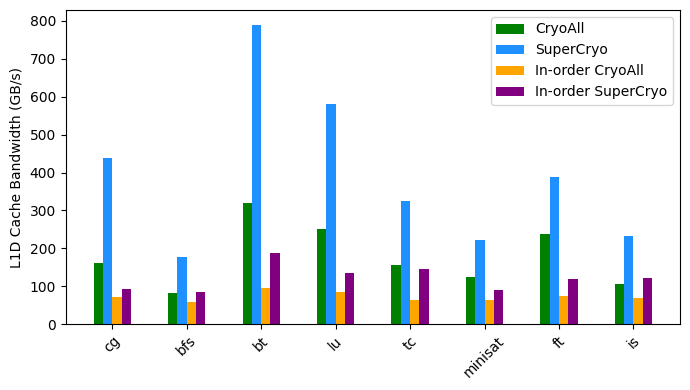

In [102]:
plot('L1D_cache_bandwidth')

                 Benchmark  L1I_cache_bandwidth_cryocorecryocache  \
0  riscv-npb-cg-size-s-run                              11.526028   
1      riscv-gapbs-bfs-run                              70.300912   
2  riscv-npb-bt-size-s-run                              43.739971   
3  riscv-npb-lu-size-s-run                              39.918129   
4       riscv-gapbs-tc-run                             133.718791   
5   riscv-llvm-minisat-run                              67.290828   
6  riscv-npb-ft-size-s-run                              62.877620   
7  riscv-npb-is-size-s-run                              40.136398   

   L1I_cache_bandwidth_supercorecryocache  \
0                               32.057737   
1                              104.361087   
2                              106.851529   
3                               90.928797   
4                              194.601643   
5                              106.009963   
6                              101.166849   
7                 

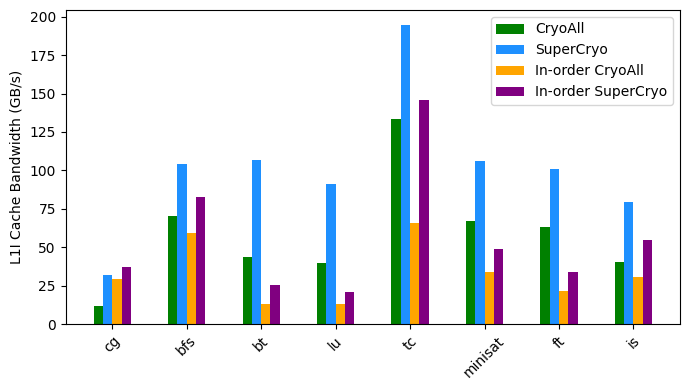

In [103]:
plot('L1I_cache_bandwidth')

                 Benchmark  L2_cache_bandwidth_cryocorecryocache  \
0  riscv-npb-cg-size-s-run                             75.352838   
1      riscv-gapbs-bfs-run                             19.280698   
2  riscv-npb-bt-size-s-run                             22.060175   
3  riscv-npb-lu-size-s-run                            125.923923   
4       riscv-gapbs-tc-run                             17.002974   
5   riscv-llvm-minisat-run                             19.873126   
6  riscv-npb-ft-size-s-run                            239.511195   
7  riscv-npb-is-size-s-run                             23.642183   

   L2_cache_bandwidth_supercorecryocache  \
0                             206.115049   
1                              34.231678   
2                              54.174173   
3                             289.352197   
4                              34.048862   
5                              36.486282   
6                             393.516600   
7                              50.4

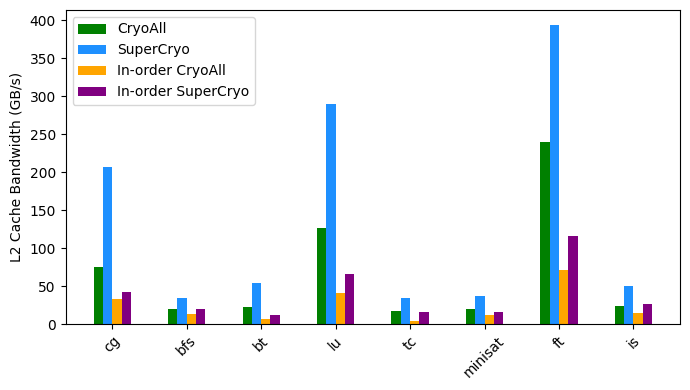

In [104]:
plot('L2_cache_bandwidth')

                 Benchmark  L3_cache_bandwidth_cryocorecryocache  \
0  riscv-npb-cg-size-s-run                             71.070212   
1      riscv-gapbs-bfs-run                              1.880478   
2  riscv-npb-bt-size-s-run                              0.122822   
3  riscv-npb-lu-size-s-run                              0.346976   
4       riscv-gapbs-tc-run                              0.940379   
5   riscv-llvm-minisat-run                             11.770503   
6  riscv-npb-ft-size-s-run                             26.639882   
7  riscv-npb-is-size-s-run                              2.428363   

   L3_cache_bandwidth_supercorecryocache  \
0                             193.706995   
1                               3.405390   
2                               0.292536   
3                               0.785833   
4                               1.673481   
5                              21.606256   
6                              43.448153   
7                               5.0

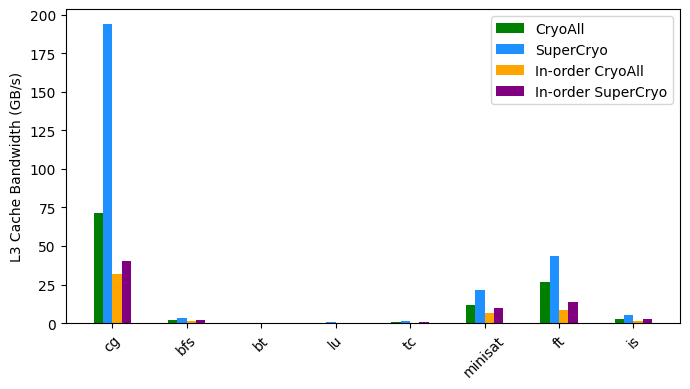

In [105]:
plot('L3_cache_bandwidth')

                 Benchmark  l3misses_cryocorecryocache  \
0  riscv-npb-cg-size-s-run                       22094   
1      riscv-gapbs-bfs-run                        8647   
2  riscv-npb-bt-size-s-run                        8922   
3  riscv-npb-lu-size-s-run                        9551   
4       riscv-gapbs-tc-run                       10816   
5   riscv-llvm-minisat-run                       53211   
6  riscv-npb-ft-size-s-run                      165409   
7  riscv-npb-is-size-s-run                        9303   

   l3misses_supercorecryocache  l3misses_supercoresupercache  \
0                        20716                         21893   
1                         8687                          8759   
2                         8684                          8894   
3                         9464                          9575   
4                        10849                         10910   
5                        53754                         52949   
6                       16677

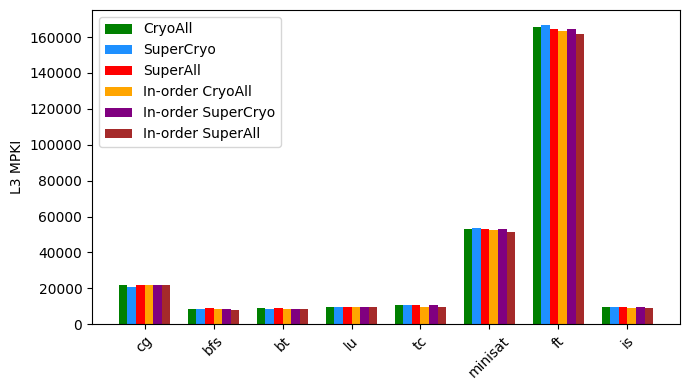

In [106]:
plot('l3misses')

                 Benchmark  normalized_l3misses_cryocorecryocache  \
0  riscv-npb-cg-size-s-run                               0.000055   
1      riscv-gapbs-bfs-run                               0.000628   
2  riscv-npb-bt-size-s-run                               0.000021   
3  riscv-npb-lu-size-s-run                               0.000064   
4       riscv-gapbs-tc-run                               0.000226   
5   riscv-llvm-minisat-run                               0.001147   
6  riscv-npb-ft-size-s-run                               0.000301   
7  riscv-npb-is-size-s-run                               0.000305   

   normalized_l3misses_supercorecryocache  \
0                                0.000052   
1                                0.000631   
2                                0.000021   
3                                0.000063   
4                                0.000226   
5                                0.001159   
6                                0.000303   
7                 

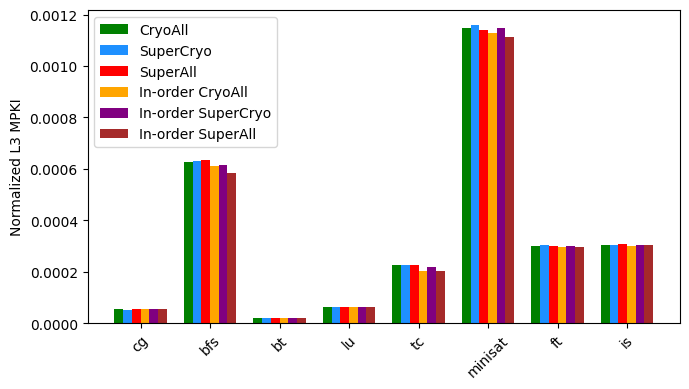

In [107]:
plot('normalized_l3misses')

                 Benchmark  l3_cache_MPKI_cryocorecryocache  \
0  riscv-npb-cg-size-s-run                         0.055117   
1      riscv-gapbs-bfs-run                         0.627598   
2  riscv-npb-bt-size-s-run                         0.021105   
3  riscv-npb-lu-size-s-run                         0.063664   
4       riscv-gapbs-tc-run                         0.225717   
5   riscv-llvm-minisat-run                         1.147222   
6  riscv-npb-ft-size-s-run                         0.300916   
7  riscv-npb-is-size-s-run                         0.304621   

   l3_cache_MPKI_supercorecryocache  l3_cache_MPKI_supercoresupercache  \
0                          0.051679                           0.054616   
1                          0.630642                           0.635536   
2                          0.020542                           0.021039   
3                          0.063084                           0.063824   
4                          0.226473                           

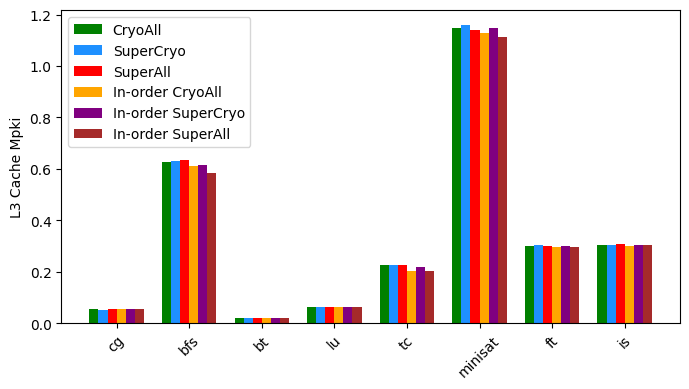

In [108]:
plot('l3_cache_MPKI')